In [67]:
import pandas as pd
from astropy.coordinates import SkyCoord
from astropy import units as u
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [68]:
# Open Fast Stars Catalog described here: https://arxiv.org/abs/1804.10179
open_fast_stars = pd.read_csv('The Open Fast Stars Catalog.csv')

open_fast_stars["dL (kpc)"] = pd.to_numeric(open_fast_stars["dL (kpc)"].str.split(',', expand=True)[0])

In [69]:
print(len(open_fast_stars))

open_fast_stars.head()

558


,Name,Mmax,Color,Spec. Type,R.A.,Dec.,R.A.',Dec.',v☉,vgal,Pbound,dL (kpc)
0,J1637+3631,-6.66241,"-0.0147,-0.30379",NaN,16:37:12.2146,+36:31:55.8776,-18.496,64.253,284710,284883.00,0.000023,2.16067
1,J004330.06+405258.4,-21.77800,2.2193,M2,"00:43:30.06,00:43:30.0752","+40:52:58.4,+40:52:58.0831",0.304,-0.734,-630,2928.91,0.000023,695.84400
2,D6-1,-9.77065,0.4674,NaN,"16:37:31.674,16:37:31.674","-74:20:36.5949,-74:20:36.5949",-80.253,-195.910,1200,2467.26,0.000023,2.37819
3,D6-3,-8.88202,0.4084,NaN,"18:52:01.885,18:52:01.885","+62:02:10.2031,+62:02:10.2031",8.981,211.455,-20,2341.28,0.000023,2.35787
4,S5-HVS1,-13.67920,-0.0083,NaN,22:54:51.6829,-51:11:44.1876,35.328,0.588,1017,1693.46,0.000023,8.63488


In [70]:
skycoords = SkyCoord(open_fast_stars["R.A."].str.split(',', expand=True)[0], open_fast_stars["Dec."].str.split(',', expand=True)[0], distance=open_fast_stars["dL (kpc)"], unit=(u.hourangle, u.deg, u.kpc))

print(skycoords[:10])

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, kpc)
    [(249.30089417,  36.53218822,   2.16067 ),
     ( 10.87525   ,  40.88288889, 695.844   ),
     (249.381975  , -74.34349858,   2.37819 ),
     (283.00785417,  62.03616753,   2.35787 ),
     (343.71534542, -51.19560767,   8.63488 ),
     (175.4435    ,   4.70480278,  85.0018  ),
     (210.35946833, -45.40153686,   5.11053 ),
     (324.61248833,  25.3737115 ,   0.985965),
     (173.82395833,   8.03374722,  97.8487  ),
     (312.50908375,  24.01328328,   1.49775 )]>


In [71]:
open_fast_stars['skycoords'] = skycoords
open_fast_stars.head()

,Name,Mmax,Color,Spec. Type,R.A.,Dec.,R.A.',Dec.',v☉,vgal,Pbound,dL (kpc),skycoords
0,J1637+3631,-6.66241,"-0.0147,-0.30379",NaN,16:37:12.2146,+36:31:55.8776,-18.496,64.253,284710,284883.00,0.000023,2.16067,"<SkyCoord (ICRS): (ra, dec, distance) in (deg,..."
1,J004330.06+405258.4,-21.77800,2.2193,M2,"00:43:30.06,00:43:30.0752","+40:52:58.4,+40:52:58.0831",0.304,-0.734,-630,2928.91,0.000023,695.84400,"<SkyCoord (ICRS): (ra, dec, distance) in (deg,..."
2,D6-1,-9.77065,0.4674,NaN,"16:37:31.674,16:37:31.674","-74:20:36.5949,-74:20:36.5949",-80.253,-195.910,1200,2467.26,0.000023,2.37819,"<SkyCoord (ICRS): (ra, dec, distance) in (deg,..."
3,D6-3,-8.88202,0.4084,NaN,"18:52:01.885,18:52:01.885","+62:02:10.2031,+62:02:10.2031",8.981,211.455,-20,2341.28,0.000023,2.35787,"<SkyCoord (ICRS): (ra, dec, distance) in (deg,..."
4,S5-HVS1,-13.67920,-0.0083,NaN,22:54:51.6829,-51:11:44.1876,35.328,0.588,1017,1693.46,0.000023,8.63488,"<SkyCoord (ICRS): (ra, dec, distance) in (deg,..."


In [72]:
# As a start, trim catalog to all those where Pbound < 0.5.
open_fast_stars = open_fast_stars[open_fast_stars.Pbound < 0.5]

In [73]:
# All stars that have P_bound < 0.1
ninety_percent_unbound = open_fast_stars[open_fast_stars.Pbound < 0.1]
print(len(ninety_percent_unbound))

47


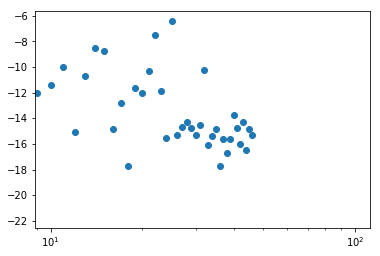

In [74]:
# Make a color-magnitude diagram.
fig = plt.figure()
ax = plt.gca()
ax.scatter(ninety_percent_unbound.Color, ninety_percent_unbound.Mmax)
ax.set_xscale('log')

## Galactic Spatial Distribution

In [75]:
x_coords = [c.cartesian.x.value for c in open_fast_stars.skycoords]
y_coords = [c.cartesian.y.value for c in open_fast_stars.skycoords]

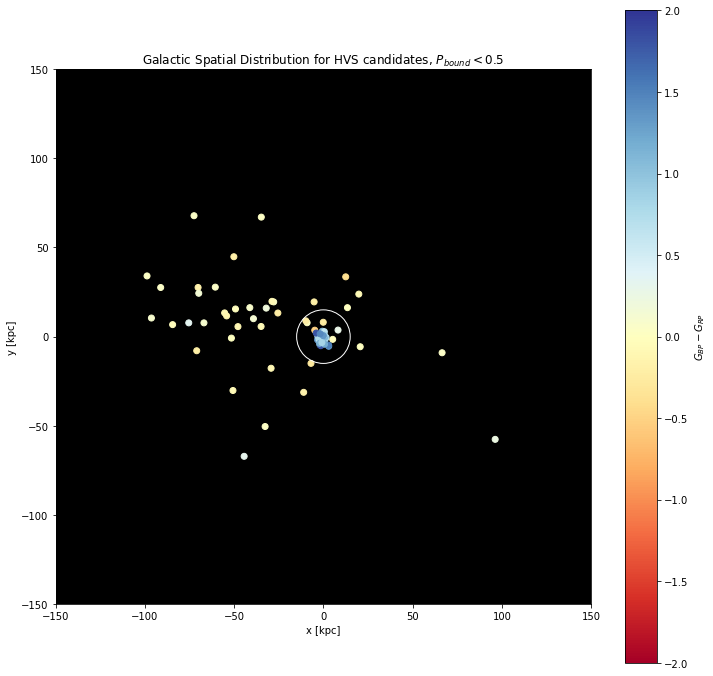

In [81]:
plt.figure(figsize=(12,12))
fig = plt.scatter(x_coords, y_coords, c=open_fast_stars.Color.str.split(',', expand=True)[0], cmap='RdYlBu', vmin=-2, vmax=2)
plt.xlim(-150, 150)
plt.ylim(-150, 150)
plt.xlabel("x [kpc]")
plt.ylabel("y [kpc]")
plt.colorbar(label='$G_{BP} - G_{RP}$')

milky_way = plt.Circle((0, 0), radius=15, color='white', fill=False)

ax = plt.gca()
ax.add_artist(milky_way)
ax.set_facecolor('black')
ax.set_aspect('equal')

plt.title("Galactic Spatial Distribution for HVS candidates, $P_{bound} < 0.5$")

plt.savefig('gal_xy.pdf')

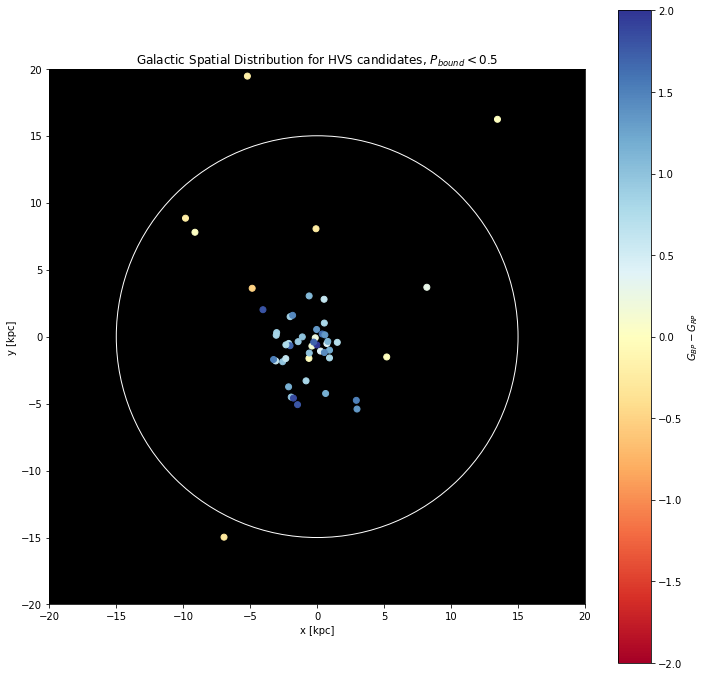

In [82]:
plt.figure(figsize=(12,12))
plt.scatter(x_coords, y_coords, c=open_fast_stars.Color.str.split(',', expand=True)[0], cmap='RdYlBu', vmin=-2, vmax=2)
plt.xlim(-20, 20)
plt.ylim(-20, 20)
plt.xlabel("x [kpc]")
plt.ylabel("y [kpc]")
plt.colorbar(label='$G_{BP} - G_{RP}$')

milky_way = plt.Circle((0, 0), radius=15, color='white', fill=False)

ax = plt.gca()
ax.add_artist(milky_way)
ax.set_facecolor('black')
ax.set_aspect('equal')

plt.title("Galactic Spatial Distribution for HVS candidates, $P_{bound} < 0.5$")

plt.savefig('gal_xy_zoomed.pdf')